In [1]:
inp1 = open('sum_7_1.txt', 'r')
inp2 = open('sum_7_2.txt', 'r')
time = []
num1 = []
for line in inp1:
    arr = line.split()
    time.append(int(arr[0]))
    num1.append(int(arr[1]))
num2 = []    
for line2 in inp2:
    arr2 = line2.split()
    num2.append(int(arr2[1]))
num = []    
for j in range(len(num1)):
    num.append(num1[j]+num2[j])

<BarContainer object of 99999 artists>

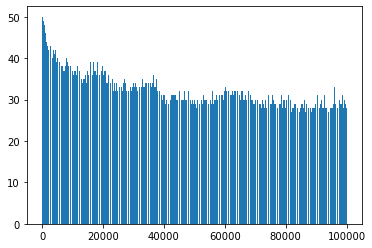

In [2]:
import matplotlib.pyplot as plt
plt.bar(time, num)

/tmp/ipykernel_2936840/1470978238.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/tmp/ipykernel_2936840/1470978238.py:6: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


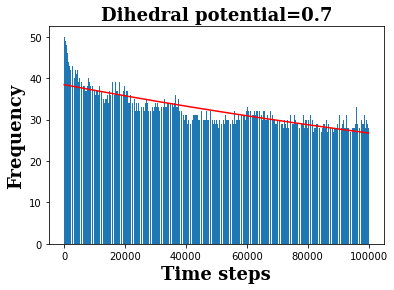

In [3]:
from scipy.optimize import curve_fit
import numpy as np
x = np.array(time)
y = np.array(num)
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)
popt, pcov = curve_fit(exponential_decay, x, y)
plt.bar(x, y)
plt.plot(x, exponential_decay(x, *popt), 'r-', label='Fit')
plt.ylabel('Frequency', fontsize=18, fontweight='bold', family='serif')
plt.xlabel('Time steps', fontsize=18, fontweight='bold', family='serif')
plt.title('Dihedral potential=0.7', fontsize=18, fontweight='bold', family='serif')
plt.savefig('freq.png', dpi=300, bbox_inches='tight')


In [4]:
time_steps = 1/popt[1]
time_steps

276247.6468236856

-1.5170422399331347 8.60046513400722
-2.5181746558653635 14.48167278488212
-3.022999875326757 17.543517961817162


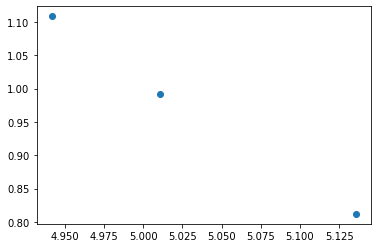

In [5]:
from math import exp
from math import log

x = [log(140), log(150), log(170)]
y50 = [log(1/0.330), log(1/0.371), log(1/0.444)]
y100 = [log(1/0.132), log(1/0.152), log(1/0.214)]
y200 = [log(1/0.075), log(1/0.089), log(1/0.134)]
plt.scatter(x,y50)
m50, b50 = np.polyfit(x,y50,1)
print(m50,b50)
m100, b100 = np.polyfit(x,y100,1)
print(m100,b100)
m200, b200 = np.polyfit(x,y200,1)
print(m200,b200)

In [6]:
from math import exp
from math import log
def linear(n):
    slope1 = -1.517
    int1 = 8.600
    slope2 = -2.518
    int2 = 14.482
    slope3 = -3.022
    int3 = 17.543
    x = log(n)
    y1 = (slope1*x) + int1
    y2 = (slope2*x) + int2
    y3 = (slope3*x) + int3
    
    tt1 = exp(-y1)
    tt2 = exp(-y2)
    tt3 = exp(-y3)
    
    return tt1, tt2, tt3, x
#    return y1, y2, y3, x

a, b, c, d = linear(20)
print(a,b,c,d)

0.017327262669518277 0.0009694844377986574 0.00020553441482390556 2.995732273553991


In [7]:
eqv_t1 = a/time_steps
eqv_t2 = b/time_steps
eqv_t3 = c/time_steps
print(eqv_t1, eqv_t2, eqv_t3)


6.272365708359268e-08 3.509475823399243e-09 7.440223190573905e-10


In [9]:
eqv_tf1 = a/(time_steps*1000)
eqv_tf2 = b/(time_steps*1000)
eqv_tf3 = c/(time_steps*1000)
print(eqv_tf1, eqv_tf2, eqv_tf3)
out1 = open('final_7.txt', 'w')
ss = '{}{:>.3e}{}{}{:>.3e}{}{}{:>.3e}{}'.format(' 50   ', eqv_tf1, '\n','100   ', eqv_tf2, '\n', '200   ', eqv_tf3, '\n')
out1.writelines(ss)
out1.close()

6.272365708359268e-11 3.509475823399243e-12 7.440223190573905e-13
